# Classification in Data Science 

## LEC NO. 46) Support Vector Machine:

###### Let’s use our previous dataset of Diabetes (In Decision Tree notebook) to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

### STEP-1) Importing Required Libraries
Let's first load the required libraries.

1) Import Pandas for DataFrames

2) Import svm froom scikit-learn module

3) Import train_test_split function

4) Import scikit-learn metrics module for accuracy calculation


In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

### STEP-2) Loading Data
Let's first load the required Pima Indian Diabetes
dataset using pandas' read CSV function.

In [2]:
df = pd.read_csv(r'F:\DataScience\diabetes.csv')
df.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


### STEP-3) Feature Selection
Here, you need to divide given columns into two
types of variables dependent(or target variable)
and independent variable(or feature variables).

In [3]:
# Feature variables
X = df[['Pregnancies', 'Insulin', 'BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']]
# Target variable
y = df['Outcome']

In [4]:
X

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### STEP-4) Splitting Data
To understand model performance, dividing the
dataset into a training set and a test set is a good
strategy.

Let's split the dataset by using function
train_test_split(). You need to pass 4 parameters
features, target, test_set size, and random_sate (for randomly selection of rows).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601
375,12,325,39.2,58,140,82,0.528
663,9,130,37.9,40,145,80,0.637
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
192,7,0,30.4,36,159,66,0.383
629,4,0,24.7,21,94,65,0.148
559,11,0,30.1,35,85,74,0.300


In [7]:
print(y_train)

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64


In [8]:
X_test

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


### STEP-5) Building Decision Tree Model
Let's build support vector machine model. First,
import the SVM module and create support vector
classifier object by passing argument kernel as the
linear kernel in SVC() function.

Then, fit your model on train set using fit() and
perform prediction on the test set using predict().

In [9]:
# Create SVM  classifer object
SVM_model = svm.SVC(kernel='linear')
# A linear kernel can be used as normal dot product of any two given observations.
# The product between two vectors is the sum of the multiplication of each pair of input values. 

In [10]:
# Train the model using the training sets,OR fit your model on train set using fit() Fn.
SVM_model = SVM_model.fit(X_train,y_train)

In [11]:
# Predict the response for test dataset
y_pred = SVM_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

### STEP-6) Evaluating Model
Let's estimate, how accurately the classifier or
model can predict the type of cultivars.
Accuracy can be computed by comparing actual
test set values and predicted values.

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of your SVM_model :",metrics.accuracy_score(y_test,y_pred))

Accuracy of your SVM_model : 0.8020833333333334


Well, you got a classification rate of almost 80.00%, considered as good accuracy And also its accuracy is better than decision tree model.

###### More Predictions Examples (can be Out of sample)

In [14]:
# small change in glucose quantity from previous DT_model example
pred1=SVM_model.predict([[4,5,30.5,60,130,65,0.6]]) # argument has to be 2D array
print(pred1)

[0]


In [15]:
pred2=SVM_model.predict([[4,5,30.5,40,150,65,0.6]]) # argument has to be 2D array
pred2

array([1], dtype=int64)

From above examples we can easily understand the Accuracy Difference between DT_model and SVM_model.

### STEP-7) Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [16]:
# comparing the y_pred(predicted values) with y_test(actual values)
from sklearn import metrics
SVM_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Diagonal values's SUM will show total no. of correct predictions.")
SVM_matrix

Diagonal values's SUM will show total no. of correct predictions.


array([[117,  13],
       [ 25,  37]], dtype=int64)

### STEP-8) Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 15.0, 'Predicted label')

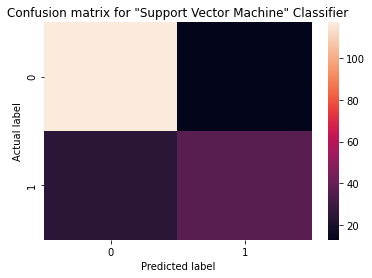

In [17]:
# The %matplotlib inline will make your plot outputs appear and be stored
# within the notebook.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.heatmap(pd.DataFrame(SVM_matrix))
plt.title('Confusion matrix for "Support Vector Machine" Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')